# Pycaret

pycaret - An open source, low-code machine learning library in Python.  Pycaret enables data scientists and analysts to perform iterative end-to-end data science experiments efficiently and allows them to reach conclusions faster due to far less time spent in coding. 

PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, Microsoft LightGBM, spaCy and many more.

[Pycaret](https://pycaret.org/)

## Installing

In [0]:
! pip install --quiet pycaret 

# Getting Data and setting up Pycaret

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv")

In [11]:
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [0]:
from pycaret.classification import *

In [13]:
churn_setup = setup(data=df, target="Churn", train_size=0.7, sampling=True, ignore_features=["customerID"], 
                    categorical_features=["SeniorCitizen", "gender", "PaperlessBilling"])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1753
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(7043, 10)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
churn_setup

(      tenure  MonthlyCharges  ...  Contract_Two year  PaperlessBilling_Yes
 0        1.0           29.85  ...                0.0                   1.0
 1       34.0           56.95  ...                0.0                   0.0
 2        2.0           53.85  ...                0.0                   1.0
 3       45.0           42.30  ...                0.0                   0.0
 4        2.0           70.70  ...                0.0                   1.0
 ...      ...             ...  ...                ...                   ...
 7038    24.0           84.80  ...                0.0                   1.0
 7039    72.0          103.20  ...                0.0                   1.0
 7040    11.0           29.60  ...                0.0                   1.0
 7041     4.0           74.40  ...                0.0                   1.0
 7042    66.0          105.65  ...                1.0                   1.0
 
 [7043 rows x 18 columns], 0       0
 1       0
 2       1
 3       0
 4       1
     

# Compare Models and Train

In [0]:
# Note they are untrained right now but just for having a look

In [15]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.797000,0.837300,0.504600,0.651800,0.568600,0.438700
1,Gradient Boosting Classifier,0.794100,0.836500,0.509900,0.640900,0.567700,0.435000
2,Logistic Regression,0.791500,0.833100,0.522200,0.629900,0.570600,0.434600
3,Ada Boost Classifier,0.791300,0.833900,0.506100,0.634000,0.562600,0.427900
4,Ridge Classifier,0.790100,0.000000,0.475500,0.642900,0.546100,0.413500
5,Linear Discriminant Analysis,0.788600,0.825600,0.527500,0.620100,0.569800,0.430900
6,Light Gradient Boosting Machine,0.786400,0.827300,0.519100,0.616600,0.563400,0.423400
7,CatBoost Classifier,0.784200,0.829800,0.500000,0.615400,0.551400,0.411300
8,Random Forest Classifier,0.771600,0.779900,0.450300,0.592900,0.511400,0.366000
9,K Neighbors Classifier,0.770800,0.752400,0.456400,0.588800,0.513800,0.367000


In [17]:
xgb_model = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7850,0.8331,0.4615,0.6250,0.5310,0.3956
1,0.7809,0.8308,0.4846,0.6058,0.5385,0.3972
2,0.7850,0.8089,0.4885,0.6214,0.5470,0.4087
3,0.8337,0.8686,0.5420,0.7634,0.6339,0.5303
4,0.8012,0.8360,0.4733,0.6813,0.5586,0.4356
5,0.8053,0.8329,0.5573,0.6577,0.6033,0.4754
6,0.7870,0.8518,0.4733,0.6327,0.5415,0.4065
7,0.7911,0.8349,0.5344,0.6250,0.5761,0.4386
8,0.7890,0.8249,0.4733,0.6392,0.5439,0.4106
9,0.8053,0.8463,0.4809,0.6923,0.5676,0.4471


In [19]:
tuned_xgb_model = tune_model("xgboost", optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7931,0.8217,0.5000,0.6373,0.5603,0.4276
1,0.7850,0.8249,0.4462,0.6304,0.5225,0.3890
2,0.7708,0.8119,0.4504,0.5900,0.5108,0.3647
3,0.8093,0.8668,0.4962,0.6989,0.5804,0.4616
4,0.7850,0.8368,0.4351,0.6404,0.5182,0.3862
5,0.7911,0.8274,0.5115,0.6321,0.5654,0.4299
6,0.7890,0.8395,0.5191,0.6239,0.5667,0.4288
7,0.7890,0.8311,0.5344,0.6195,0.5738,0.4346
8,0.7688,0.8250,0.3817,0.6024,0.4673,0.3290
9,0.7992,0.8292,0.4733,0.6739,0.5561,0.4314


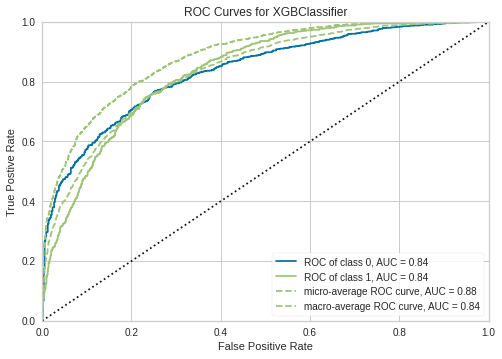

In [20]:
plot_model(tuned_xgb_model, plot="auc")

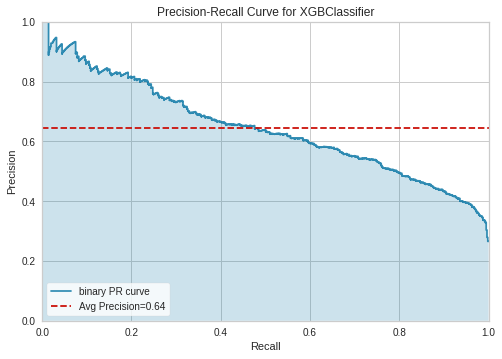

In [21]:
plot_model(tuned_xgb_model, plot = 'pr')

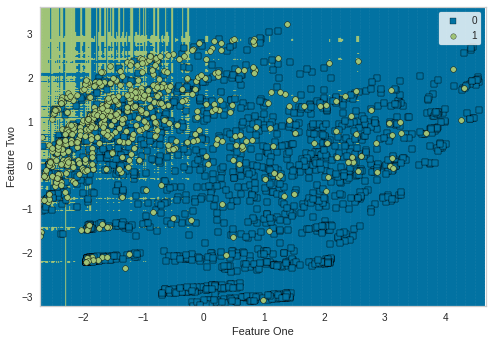

In [22]:
plot_model(tuned_xgb_model, plot = 'boundary')

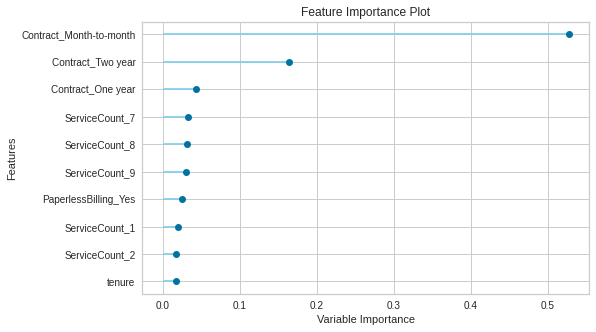

In [23]:
plot_model(tuned_xgb_model, plot='feature')

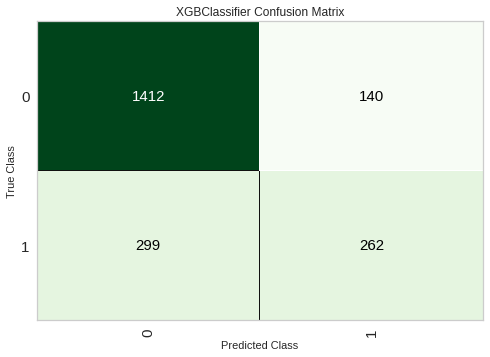

In [24]:
plot_model(tuned_xgb_model, plot = 'confusion_matrix')

In [0]:
xgb_final = finalize_model(tuned_xgb_model)

In [26]:
xgb_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=90,
              min_child_weight=3, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1753,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

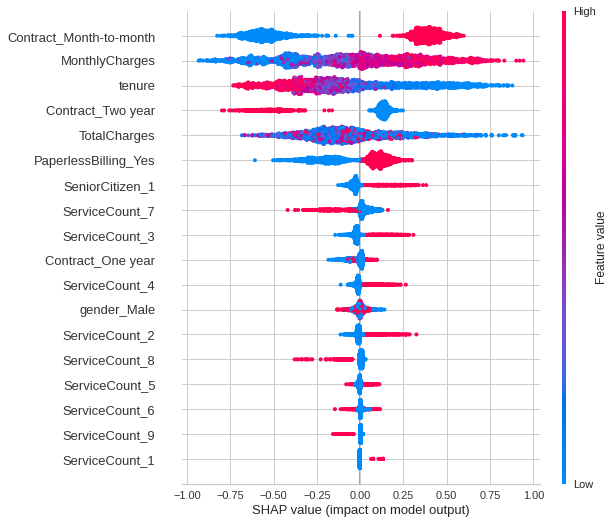

In [27]:
interpret_model(tuned_xgb_model)

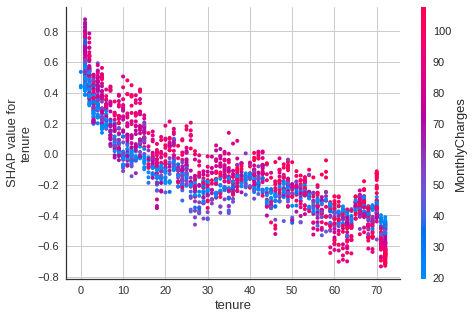

In [28]:
interpret_model(tuned_xgb_model, plot='correlation')

In [29]:
save_model(tuned_xgb_model,'xgb_model')

Transformation Pipeline and Model Succesfully Saved


In [30]:
!ls

catboost_info  sample_data  xgb_model.pkl


In [31]:
load_xgb = load_model('xgb_model')

Transformation Pipeline and Model Sucessfully Loaded


In [34]:
print(load_xgb)
# load_xgb

[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['SeniorCitizen',
                                                            'gender',
                                                            'PaperlessBilling'],
                                      display_types=True,
                                      features_todrop=['customerID'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                tar...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers',

In [35]:
evaluate_model(tuned_xgb_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…